## Projet de Maths
Visualisation de données des tremblements de terre
Enzo Peigne | Maxence Laurent | 2022-2023

### Importation des librairies

In [2]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sn
import plotly.express as px

### Lecture des données

In [3]:
# Lecture du fichier seismes_2014.csv

seismes = pd.read_csv('seismes_2014.csv', sep=',')

Vérification du chargement des données

In [4]:
seismes.head()

,instant,lat,lon,pays,mag,profondeur
0,2014-01-31 23:53:37.000,60.252000,-152.7081,Alaska,1.10,90.20
1,2014-01-31 23:48:35.452,37.070300,-115.1309,Nevada,1.33,0.00
2,2014-01-31 23:47:24.000,64.671700,-149.2528,Alaska,1.30,7.10
3,2014-01-31 23:30:54.000,63.188700,-148.9575,Alaska,0.80,96.50
4,2014-01-31 23:30:52.210,32.616833,-115.6925,Mexico,1.34,10.59


### Partie 1 : Les lieux les plus secoués

Taille de la base de données

In [5]:
len(seismes)

120108

In [6]:
#obtenir les 20 pays les plus touchés par les séismes
noms = seismes['pays'].value_counts().head(20).index


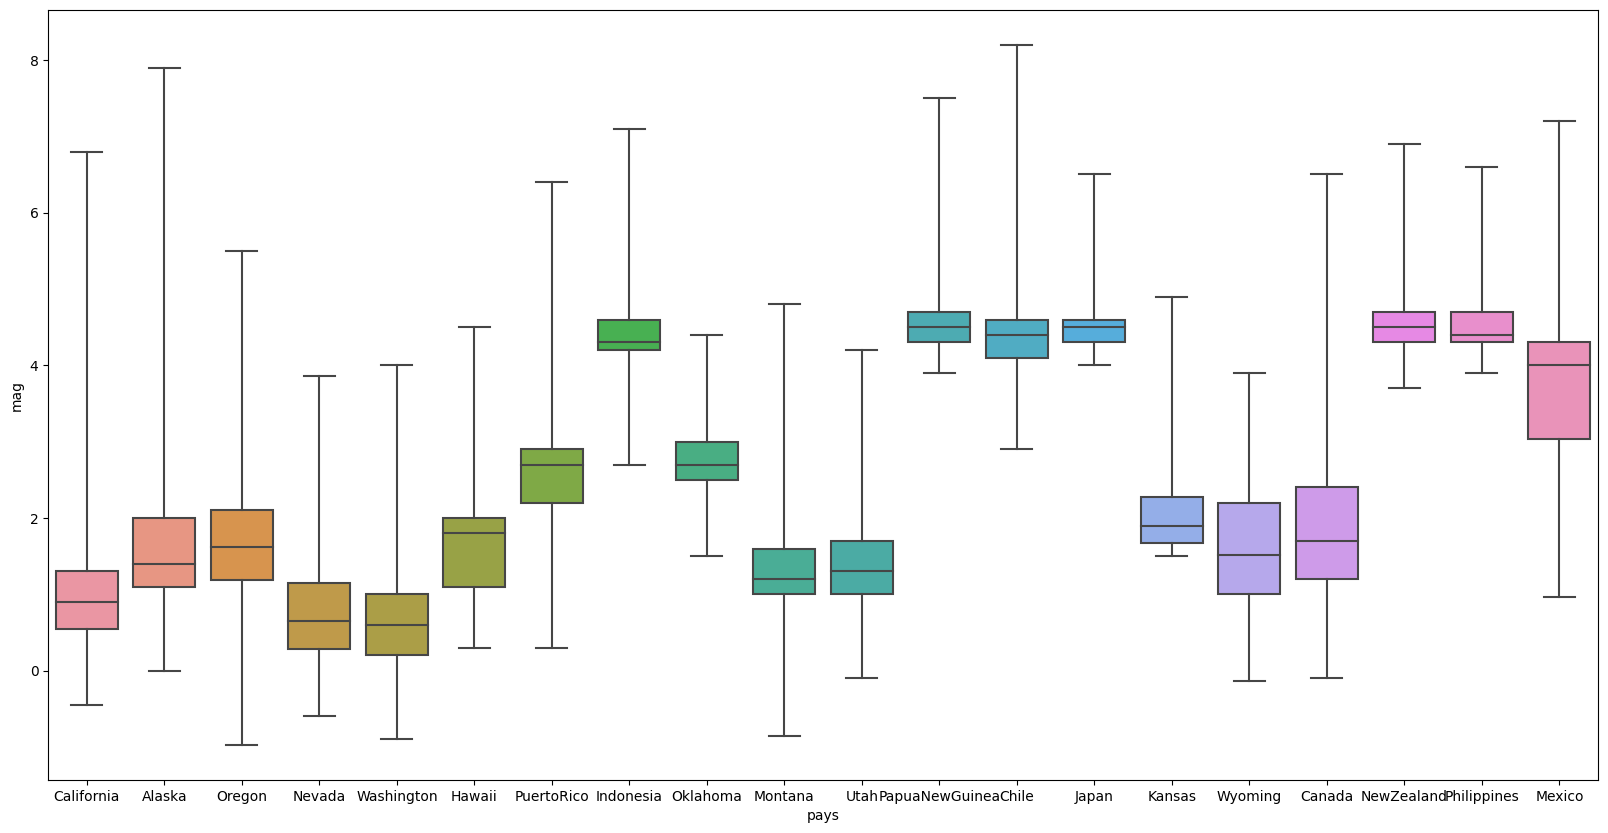

In [7]:
#boite a moustache de la magnitude des séismes des 20 pays les plus touchés par les séismes en ordre décroissant
plt.figure(figsize=(20,10))
sn.boxplot(x='pays', y='mag', data=seismes, order=noms, whis=100)
plt.show()

In [15]:
#obtenir les 6 pays avec la plus grande magnitude mag
noms2 = seismes.groupby('pays')['mag'].max().sort_values(ascending=False).head(6)

#obtenir le nombre de séismes pour la californie de magnitude mag <= 2
californie = seismes[(seismes['pays'] == 'California') & (seismes['mag'] <= 2)]


#obtenir le nombre de séismes pour l'alaska de magnitude mag <= 2
alaska = seismes[(seismes['pays'] == 'Alaska') & (seismes['mag'] <= 2)]
len(alaska)
len(californie)

#affichage des valeurs de la magnitude des séismes
print("Nombre de séismes de la Californie de magnitude <=2: ", len(californie))
print("Nombre de séismes de l'Alaska de magnitude <=2: ", len(alaska))


Nombre de séismes de la Californie de magnitude <=2:  41714
Nombre de séismes de l'Alaska de magnitude <=2:  26145


### Partie 2 : Cartes des séismes dans le monde

In [185]:
# Créer une table F, contenant la sélection des séismes de magnitude supérieure ou égale à 3 et n'étant pas égal à nan
# Pour chaque magnitude, on retient seulement sa partie entière

F = seismes[(seismes['mag'] >= 3) & (seismes['mag'].notnull())]
F['m'] = F['mag'].astype(int)
F.head()

<ipython-input-185-cac4b8a42e56>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,instant,lat,lon,pays,mag,profondeur,m
10,2014-01-31 23:08:03.660,-4.9758,153.9466,PapuaNewGuinea,4.2,110.18,4
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,NewZealand,4.3,95.84,4
16,2014-01-31 22:49:49.740,-23.1192,179.1174,SouthoftheFijiIslands,4.4,528.34,4
24,2014-01-31 22:22:14.600,18.4825,-64.7608,BritishVirginIslands,3.4,91.00,3
26,2014-01-31 22:19:44.330,51.1569,-178.0910,Alaska,4.2,37.50,4


In [186]:
# On observe la taille de la table F

len(F)

21589

In [187]:
# On réalise une heat map où l'on affiche les séismes de magnitude supérieure ou égale à 3 et inférieure à 5
# Pour afficher la heat map, on utilise la fonction density_mapbox de la librairie plotly.express

F1 = F[(F['m'] >= 3) & (F['m'] < 5)]
fig = px.density_mapbox(F1, lat='lat', lon='lon', z='mag', radius=10, center=dict(lat=0, lon=180), zoom=0, mapbox_style="stamen-terrain")
fig.show()

In [188]:
# On définie le dictionnaire de palette

palette = {3: 'hotpink', 4: 'green', 5: 'chocolate', 6: 'blue', 7: 'red', 8: 'black'}

# On créé une table F2, contenant la sélection des séismes de magnitude supérieure ou égale à 5

F2 = F[(F['m'] >= 5)]
F2.head()

,instant,lat,lon,pays,mag,profondeur,m
110,2014-01-31 16:39:06.990,54.6664,159.5622,Russia,5.1,169.22,5
784,2014-01-29 18:26:48.000,-22.2510,-69.0100,Chile,5.0,92.70,5
829,2014-01-29 13:46:50.340,23.8428,93.9581,Burma,5.1,59.11,5
877,2014-01-29 10:01:50.730,-18.5087,-69.3735,Chile,5.6,120.03,5
1016,2014-01-29 00:32:28.240,-9.5949,161.2282,SolomonIslands,5.6,41.00,5


In [189]:
# On créé une carte de point avec le groupe F2 et on applique à chaque point la couleur de la palette en fonction de m avec la fonction scatter_mapbox de la librairie plotly.express
# On ajoute les couleurs de la palette à scatter_mapbox


fig2 = px.scatter_mapbox(F2, lat='lat', lon='lon', color='m', color_continuous_scale=['chocolate', 'blue', 'red', 'black'], zoom=0, mapbox_style="stamen-terrain")
fig2.show()


In [190]:
# On fusionne les deux figures précédentes pour former une nouvelle figure
# On mets l'échelle de couleur selon la palette définie précédemment
# Colorscale est une liste de couleurs, elle n'accepte pas les dictionnaires de couleurs
# Donc on place directement la suite de couleurs de la palette dans colorscale

fig.add_trace(fig2.data[0])
fig.update_layout(coloraxis=dict(colorscale=['hotpink', 'green', 'chocolate', 'blue', 'red', 'black']))
fig.show()

### Partie 3 : Carte des séismes façon « Minard »

### Partie 4 : Utilisation de R et Shiny